In [1]:
from keras.datasets import cifar10

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 52s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

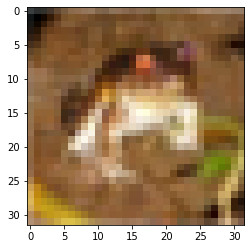

In [7]:
plt.imshow(x_train[0])

In [8]:
x_train.max()

255

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_test.shape

(10000, 32, 32, 3)

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
from keras.utils import to_categorical

In [13]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

In [14]:
from keras.models import Sequential

In [16]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [21]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [23]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7572 - accuracy: 0.3660
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1984 - accuracy: 0.5792
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0216 - accuracy: 0.6458
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9169 - accuracy: 0.6829
Epoch 5/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8257 - accuracy: 0.7136
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7471 - accuracy: 0.7439
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6975 - accuracy: 0.7612
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6390 - accuracy: 0.7831
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5973 - accuracy: 0.7971
Epoch 10/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0

In [25]:
model.metrics_names

['loss', 'accuracy']

In [26]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1081 - accuracy: 0.6661


[1.1080540418624878, 0.666100025177002]

In [27]:
from sklearn.metrics import classification_report

In [30]:
predictions=model.predict_classes(x_test)

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1000
           1       0.81      0.78      0.80      1000
           2       0.54      0.59      0.56      1000
           3       0.48      0.42      0.45      1000
           4       0.66      0.55      0.60      1000
           5       0.53      0.61      0.57      1000
           6       0.83      0.69      0.75      1000
           7       0.67      0.75      0.71      1000
           8       0.74      0.79      0.76      1000
           9       0.74      0.76      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

